In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set()

**Importing the dataset**

In [4]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
#checking for null values 
df.isna().any().sum()

0

In [6]:
#Removing User Id Column as all Ids are unique and it wont help us in the analysis.

In [7]:
df.drop("User ID",axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
#encoding the categroical column "Gender"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [9]:
X = df.iloc[:, :-1].values
Y= df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [10]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

Shape of X_train is  (320, 3)
Shape of X_test is  (80, 3)
Shape of Y_train is  (320,)
Shape of Y_test is  (80,)


**Feature Scaling**

In [11]:
#Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train,X_test,Y_train,Y_test,sep="\n\n")

[[ 1.03823026 -0.25808475 -0.33624928]
 [ 1.03823026 -0.82439644 -0.77364672]
 [ 1.03823026  1.06330919 -1.21104417]
 [ 1.03823026 -0.35247004 -0.77364672]
 [-0.96317747  0.9689239   1.87989775]
 [-0.96317747  0.02507109  1.23838151]
 [-0.96317747 -0.82439644 -1.21104417]
 [-0.96317747 -1.29632285 -1.240204  ]
 [-0.96317747  0.11945637  0.0428285 ]
 [ 1.03823026 -0.16369947 -0.51120826]
 [ 1.03823026 -1.29632285 -1.35684331]
 [-0.96317747 -1.86263454  0.48022594]
 [ 1.03823026  1.53523559  0.01366867]
 [-0.96317747 -0.16369947 -0.4528886 ]
 [-0.96317747  1.34646503  1.99653707]
 [-0.96317747  1.15769447 -0.7444869 ]
 [-0.96317747 -0.63562588  0.56770543]
 [ 1.03823026  1.25207975 -1.35684331]
 [-0.96317747  0.21384165  0.07198833]
 [-0.96317747 -0.63562588  0.0428285 ]
 [-0.96317747 -0.63562588 -1.59012195]
 [-0.96317747 -1.67386397  0.36358662]
 [-0.96317747  1.91277672 -0.65700741]
 [-0.96317747  2.007162   -0.80280655]
 [-0.96317747  0.87453862  1.26754134]
 [ 1.03823026  1.81839144

**Fitting SVM to the Training set**

In [13]:
#using linear kernal
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

**Predicting the Test set results**

In [14]:
Y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


[[48  3]
 [13 16]]


In [16]:
accuracy_score(Y_test, Y_pred)

0.8

In [17]:
#we got 80 percent accuracy using the SVM using linear kernel

In [18]:
#using RBF as kernel

from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(X_train, Y_train)

SVC(random_state=0)

In [19]:
Y_pred_rbf = classifier_rbf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(Y_test, Y_pred_rbf)
print(cm1)


[[47  4]
 [ 3 26]]


In [21]:
accuracy_score(Y_test, Y_pred_rbf)

0.9125

In [22]:
#we got accuracy of 91 percent using SVM with rbf kernel.

**Visualising the Training set results**

#taking only two features for visualiaztion

In [23]:
df1=df.drop("Gender",axis=1)
df1


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [24]:
X_2d = df1.iloc[:, :-1].values
Y_2d= df1.iloc[:, -1].values

In [25]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train_2d, X_test_2d, Y_train_2d, Y_test_2d = train_test_split(X_2d, Y_2d, test_size=0.2, random_state=0,stratify=Y_2d)
print('Shape of X_train_2d is ', X_train_2d.shape)
print('Shape of X_test_2d is ', X_test_2d.shape)
print('Shape of Y_train_2d is ', Y_train_2d.shape)
print('Shape of Y_test_2d is ', Y_test_2d.shape)

Shape of X_train_2d is  (320, 2)
Shape of X_test_2d is  (80, 2)
Shape of Y_train_2d is  (320,)
Shape of Y_test_2d is  (80,)


In [26]:
#using linear kernal
from sklearn.svm import SVC
classifier_2d = SVC(kernel = 'rbf', random_state = 0)
classifier_2d.fit(X_train_2d, Y_train_2d)

SVC(random_state=0)

In [27]:
Y_pred_2d = classifier_2d.predict(X_test_2d)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_2d = confusion_matrix(Y_test_2d, Y_pred_2d)
print(cm_2d)

[[50  1]
 [16 13]]


In [29]:
accuracy_score(Y_test_2d, Y_pred_2d)

0.7875

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


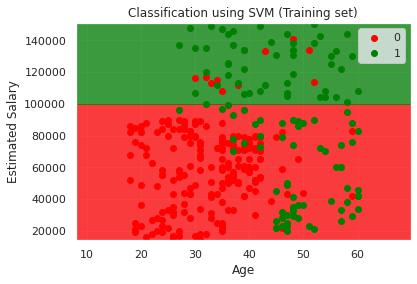

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_2d, Y_train_2d
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification using SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


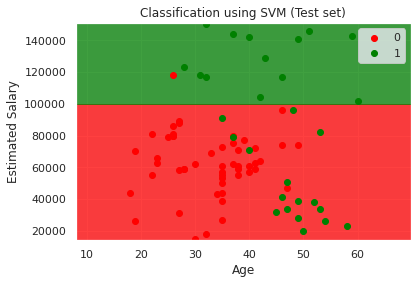

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_2d, Y_test_2d
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification using SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()